# Classifying Image Location
In order to find locality information in an image, we classify images using a location image dataset (http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/). This dataset includes around 60k images from three different cities: Pittsburg, Manhattan, and Orlando.

This notebook contains code for running several of the training tests we ran as well as output for ease of viewing. Some of the code was run separately as python scripts but were recomposed into here for ease of viewing. Please note several libraries outside standard libraries (torch, scipy, numpy, etc.)  for neural network learning: mainly captum and simple-hierarchy-pytorch. The library simple-hierarchy-pytorch was written by Rajiv Sarvepalli, one of the authors of this paper.
Please note that PyTorch and captum (and other standard ML libraries) tutorials and documentation were used to support our research within this notebook. This notebook is not easily runnable, and therefore best suited for viewing the coding work done for the image model creation, comparison, and testing. This notebook is best viewed in google Colab for ease of navigation with sections.

In [ ]:
import torch, os, json
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import torch.nn as nn
import scipy.io
from typing import Optional, Dict, List, Tuple, Callable
import numpy as np
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import torch
from PIL import Image


#### Get Dataset

In [ ]:
!curl -o "C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh\GPS_Long_Lat_Compass.mat" http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/GPS_Long_Lat_Compass.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  137k  100  137k    0     0   137k      0  0:00:01 --:--:--  0:00:01  732k


In [ ]:
!curl -o "C:\Users\rajiv\Vision_Language_Project\part1.zip" -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part1.zip
!unzip -o -q part1.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh\images'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part2.zip
!unzip -o -q part2.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part3.zip
!unzip -o -q part3.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part4.zip
!unzip -o -q part4.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part5.zip
!unzip -o -q part5.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part6.zip
!unzip -o -q part6.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part7.zip
!unzip -o -q part7.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part8.zip
!unzip -o -q part8.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part9.zip
!unzip -o -q part9.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part10.zip
!unzip -o -q part10.zip -d 'C:\Users\rajiv\Vision_Language_Project\Datasets\Dataset_PitOrlManh'

File ‘part1.zip’ already there; not retrieving.

--2020-11-16 23:46:18--  http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part2.zip
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4818951063 (4.5G) [application/zip]
Saving to: ‘part2.zip’

part2.zip           100%[===================>]   4.49G  10.9MB/s    in 3m 17s  

2020-11-16 23:49:35 (23.3 MB/s) - ‘part2.zip’ saved [4818951063/4818951063]

--2020-11-16 23:52:31--  http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part3.zip
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4815876323 (4.5G) [application/zip]
Saving to: ‘part3.zip’

part3.zip           100%[===================>]   4.48G 

In [ ]:
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part9.zip
!unzip -o -q part9.zip -d 'drive/My Drive/Dataset_PitOrlManh'
!wget -nc http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part10.zip
!unzip -o -q part10.zip -d 'drive/My Drive/Dataset_PitOrlManh'

--2020-11-17 02:01:35--  http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part9.zip
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4235667031 (3.9G) [application/zip]
Saving to: ‘part9.zip’

part9.zip           100%[===================>]   3.94G  25.7MB/s    in 2m 0s   

2020-11-17 02:03:35 (33.6 MB/s) - ‘part9.zip’ saved [4235667031/4235667031]

--2020-11-17 02:07:54--  http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/part10.zip
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2026510649 (1.9G) [application/zip]
Saving to: ‘part10.zip’

part10.zip          100%[===================>]   1.89G  23.5MB/s    in 81s     

2020-11-17 02:09:15 (

#### Dataset Loading and Exploration

In [ ]:
class ImageGeoLocation(Dataset):
    def __init__(self, annot_file : str, root_dir : str, bounds_to_key : Dict[tuple, int], categories_to_names: Dict[str, int], 
                  image_transform=None, first_n : Optional[int] = None, convert_cord_annos : Optional[Callable] = None):
        """
        Args:
            annot_file (string)
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.categories_to_names = categories_to_names
        self.coord_annotations, self.file_names = self.annot_file_reader(annot_file)
        if convert_cord_annos:
          self.annotations = convert_cord_annos(self.coord_annotations)
        else:
          self.annotations = self.convert_annos(self.coord_annotations, bounds_to_key)
        if first_n:
          self.file_names = self.file_names[0:first_n]
        self.root_dir = root_dir
        self.image_transform = image_transform
    def __len__(self):
        return len(self.file_names)
    def convert_annos(self, annotations, bounds_to_key):
      new_annos = dict()
      max_key = max(bounds_to_key, key=lambda k: bounds_to_key[k])
      unknown_label = bounds_to_key[max_key] + 1
      for fn in annotations:
        unmatched = True
        for bound in bounds_to_key:
          lat, lon = annotations[fn]
          label_vector = torch.zeros((len(self.categories_to_names)))
          if lat >= bound[0] and lat <= bound[2] and lon >= bound[1] and lon <= bound[3]:
            label_vector[bounds_to_key[bound]] = 1
            new_annos[fn] = label_vector
            unmatched = False
            break
        if unmatched:
          label_vector[unknown_label] = 1
          new_annos[fn] = label_vector
      return new_annos
        
    def annot_file_reader(self, annot_file : str) -> Tuple[Dict[str, List[float]], List[str]]:
      mat = scipy.io.loadmat(annot_file)
      annots = mat['GPS_Compass']
      lat = annots[:,0]
      lon = annots[:,1]
      annotations = dict()
      file_names = list()
      for i in range(len(lat)):
        string_i = str(i + 1)
        N = 6
        file_name_base = string_i.zfill(N) 
        for j in range(6):
          file_name = file_name_base + "_" + str(j) + ".jpg"
          annotations[file_name] = np.array([annots[i,0], annots[i,1]])
          file_names.append(file_name)
      return annotations, np.array(file_names)

    def __getitem__(self, idx: int):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.file_names[idx])
        image = Image.open(img_name).convert('RGB')
        location = self.annotations[self.file_names[idx]]
        if self.image_transform:
            image = self.image_transform(image)
        sample = (image, location)     
        return sample
    def get_img(self, idx: int):
      if torch.is_tensor(idx):
        idx = idx.tolist()

      img_name = os.path.join(self.root_dir,
                              self.file_names[idx])
      image = Image.open(img_name).convert('RGB')
      return image

In [ ]:
def show_image(image, location):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
bounds_to_key = {
    (35.4406, -85.9959, 45.4406, -76.9959) : 0,
    (23.5383, -85.3792, 35.5383, -75.3792) : 1,
    (35.7831, -77.9712, 45.7831, -70.9712) : 2
}
categories_to_names = {
    0 : "Pittsburgh ",
    1 : "Orlando ",
    2 : "Manhattan",
}

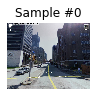

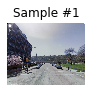

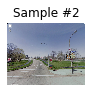

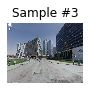

In [ ]:
face_dataset = ImageGeoLocation(annot_file='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/GPS_Long_Lat_Compass.mat', 
                                root_dir='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/images', bounds_to_key=bounds_to_key,
                                  categories_to_names=categories_to_names, first_n=500)
fig = plt.figure()
for i in range(len(face_dataset)):
    sample = face_dataset[i]


    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_image(*sample)

    if i == 3:
        plt.show()
        break
        

In [ ]:
import torchvision.transforms as transforms

batch_size = 4

image_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

dataset = ImageGeoLocation(annot_file='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/GPS_Long_Lat_Compass.mat', 
                                root_dir='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/images', 
                                bounds_to_key=bounds_to_key, image_transform = image_transform,
                                  categories_to_names=categories_to_names, first_n=500)

In [ ]:
count_per_label = {
    0: 0,
    1: 0,
    2: 0,
}
all_labels = []
for fn in dataset.annotations:
  label = np.where(dataset.annotations[fn]==1)[0][0]
  count_per_label[label] += 1
  all_labels.append(dataset.coord_annotations[fn])
all_labels = np.array(all_labels)
all_labels[:,[0,1]] = all_labels[:,[1,0]]

print(count_per_label)

{0: 18468, 1: 7944, 2: 35646}


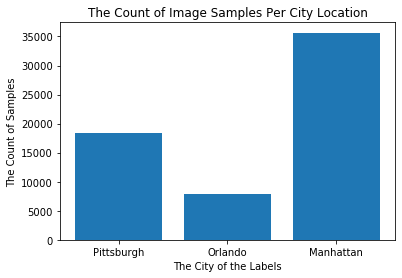

In [ ]:
plt.bar(range(len(count_per_label)), list(count_per_label.values()), align='center')
plt.xticks(range(len(count_per_label)), ['Pittsburgh', 'Orlando', 'Manhattan'])
plt.xlabel('The City of the Labels')
plt.ylabel('The Count of Samples')
plt.title('The Count of Image Samples Per City Location')
plt.savefig('label_distrbution.pdf')



#### K-means Clustering for Categorization of Labels

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
n_cluster1 = 3
kmeans = KMeans(n_clusters=n_cluster1)
kmeans.fit(all_labels)
y_kmeans = kmeans.predict(all_labels)

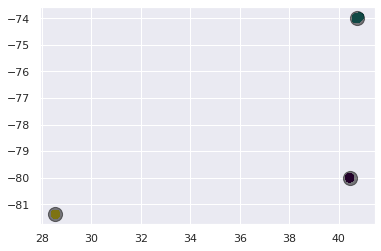

In [ ]:
plt.scatter(all_labels[:, 0], all_labels[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.savefig('intial_clusters.pdf', format='pdf')

##### Hierarchical Clustering 
The first 3 clusters are obvious. Now choosing inner city clusters is harder. We can use these idea to have hierarchical labeling or we can simply do two classifications: one for the higher hierarchy and one for the lower.

In [ ]:
idx = np.where(y_kmeans == 0)

X_cluster0 = all_labels[idx]
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_cluster0)
y_cluster0 = kmeans.predict(X_cluster0)

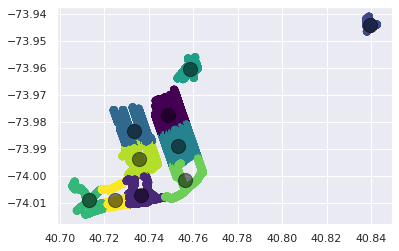

In [ ]:
plt.scatter(X_cluster0[:, 0], X_cluster0[:, 1], c=y_cluster0, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
def split_clusters_again(cluster_num, n_clusters, X, previous_clustering, save_fig=False):
  plt.clf()
  idx = np.where(previous_clustering == cluster_num)
  X_cluster0 = X[idx]
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X_cluster0)
  y_cluster0 = kmeans.predict(X_cluster0)
  plt.scatter(X_cluster0[:, 0], X_cluster0[:, 1], c=y_cluster0, s=50, cmap='viridis')
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
  if not save_fig:
    plt.show()
  else:
    plt.savefig('seconary_clusters' + str(i) + '.pdf', format='pdf', bbox_inches='tight')

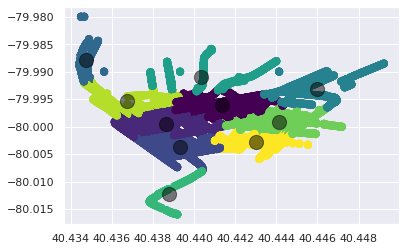

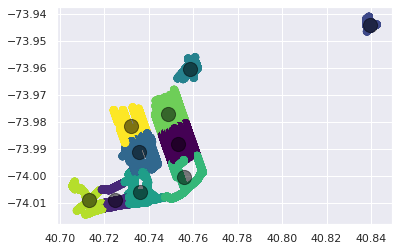

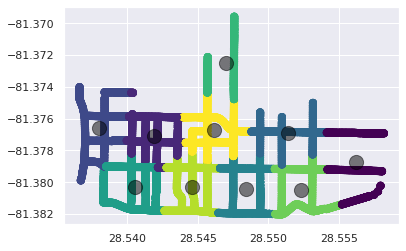

In [ ]:
for i in range(n_cluster1):
  split_clusters_again(i, 10, all_labels, y_kmeans)

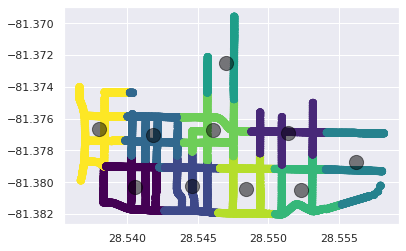

In [ ]:
for i in range(n_cluster1):
  split_clusters_again(i, 10, all_labels, y_kmeans, save_fig=True)

##### Plot Generation for Paper

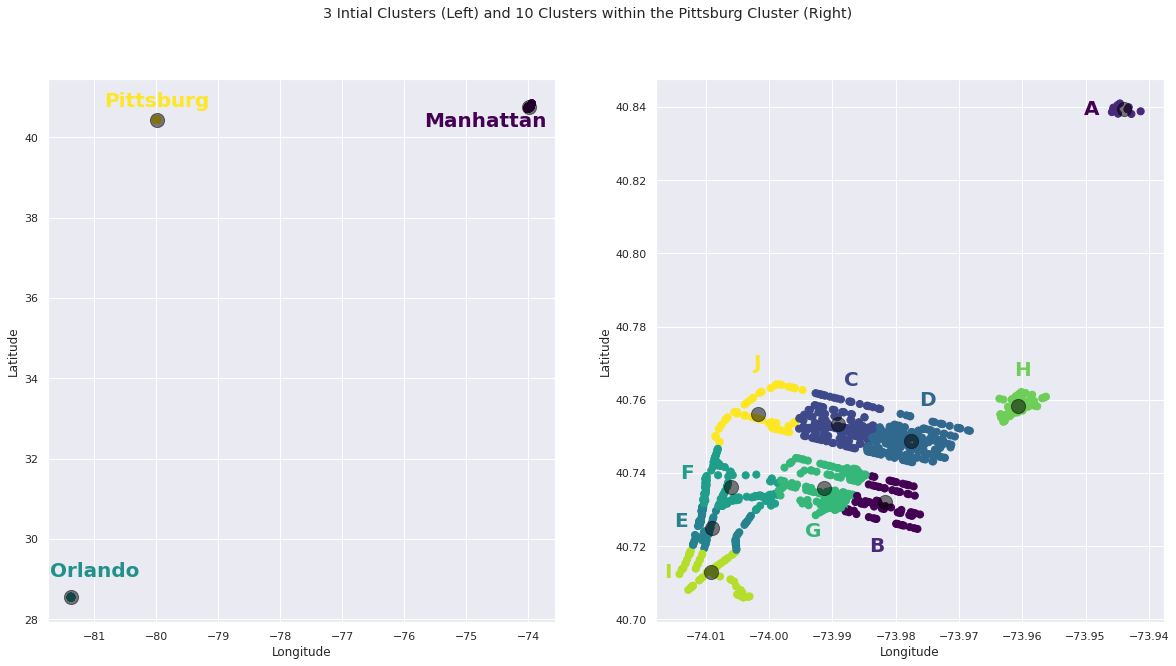

In [ ]:
from matplotlib.cm import get_cmap
np.random.seed(7)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(20)
n_cluster1 = 3
labels = {'Manhattan': (-74.7, 40.4),
          'Orlando': (-81.0, 29.2),
          'Pittsburg': (-80.0, 40.9)
}
cm = get_cmap('viridis')
cgen = lambda i : cm(1.*i/(n_cluster1 - 1))
for i, label in enumerate(labels):
  ax1.annotate(label, 
                  labels[label],
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  c=cgen(i)) 
  
kmeans = KMeans(n_clusters=n_cluster1)
kmeans.fit(all_labels)
y_kmeans = kmeans.predict(all_labels)
sample = np.random.choice(len(all_labels), 1000)
ax1.scatter(all_labels[sample, 0], all_labels[sample, 1], c=y_kmeans[sample], s=50, cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

idx = np.where(y_kmeans == 0)
X_cluster0 = all_labels[idx]
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_cluster0)
y_cluster0 = kmeans.predict(X_cluster0)
cgen = lambda i : cm(1.*i/(10 - 1))
labels2 = {'A': (-73.94899707, 40.83939683),
          'B': (-73.983, 40.72),
          'C': (-73.987, 40.7655),
           'D': (-73.975, 40.76),
           'E': (-74.014, 40.727),
           'F': (-74.013, 40.74),
           'G': (-73.993, 40.724),
           'H': (-73.96, 40.768),
           'I': (-74.016, 40.713),
           'J': (-74.002, 40.77),
}
for i, label in enumerate(labels2):
  ax2.annotate(label, 
                  labels2[label],
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  c=cgen(i)) 
sample = np.random.choice(len(X_cluster0), 1000)

ax2.scatter(X_cluster0[sample, 0], X_cluster0[sample, 1], c=y_cluster0[sample], s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
fig.suptitle('3 Intial Clusters (Left) and 10 Clusters within the Pittsburg Cluster (Right)')
fig.show()
fig.savefig('clustering_demo.pdf', format='pdf', bbox_inches='tight')

#### Set Up Data Labels

In [ ]:
all_labels = list()
fns = list()
for fn in dataset.annotations:
  label = np.where(dataset.annotations[fn]==1)[0][0]
  all_labels.append(dataset.coord_annotations[fn])
  fns.append(fn)
all_labels = np.array(all_labels)
files_to_labels = dict()
kmeans = KMeans(n_clusters=3, random_state=2)
highest_cluster = kmeans.fit_predict(all_labels)
for i in range(3):
    idx = np.where(highest_cluster == i)
    X_cluster0 = all_labels[idx]
    idx_to_X = {i:i_X for i_X, i in enumerate(idx[0])}
    kmeans = KMeans(n_clusters=10, random_state=2)
    kmeans.fit(X_cluster0)
    y_cluster0 = kmeans.predict(X_cluster0)
    for id_fn in idx[0]:
        files_to_labels[fns[id_fn]] = (highest_cluster[id_fn], y_cluster0[idx_to_X[id_fn]] + (highest_cluster[id_fn] * 10) + 3)
files_to_labels[max(files_to_labels, key=lambda x : files_to_labels[x][1])]

(2, 32)

In [ ]:
def convert_annos(annos):
    for fn in files_to_labels:
        vals = files_to_labels[fn]
        label = torch.zeros(33)
        label[vals[0]] = 1
        label[vals[1]] = 1
        files_to_labels[fn] = label
    return files_to_labels
import torchvision.transforms as transforms

batch_size = 4

image_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

dataset = ImageGeoLocation(annot_file='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/GPS_Long_Lat_Compass.mat', 
                                root_dir='C:/Users/rajiv/Vision_Language_Project/Datasets/Dataset_PitOrlManh/images', 
                                bounds_to_key=bounds_to_key, image_transform = image_transform, convert_cord_annos = convert_annos,
                                  categories_to_names=categories_to_names)


In [ ]:
for key in dataset.annotations:
    print(fn, dataset.annotations[key])
    break

010343_5.jpg tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
count_per_anno = {
} 
for key in dataset.annotations:
    label = np.sum(np.where(dataset.annotations[key]==1)[0])
    key2 = label
    if key2 in count_per_anno:
        count_per_anno[key2] += 1
    else:
        count_per_anno[key2] = 1
count_per_anno

{11: 3060,
 5: 2448,
 3: 2088,
 12: 2400,
 9: 2130,
 6: 1386,
 4: 2118,
 10: 1500,
 8: 1008,
 7: 330,
 21: 930,
 18: 744,
 22: 732,
 19: 618,
 15: 972,
 23: 924,
 14: 360,
 16: 708,
 17: 984,
 20: 972,
 28: 6486,
 31: 5364,
 25: 2538,
 30: 2952,
 32: 5544,
 29: 4452,
 34: 2688,
 27: 2328,
 33: 2448,
 26: 846}

In [ ]:
new_categories_to_names = dict()
for i in range(0, 33):
    if i < 13:
        city = 0
    elif i > 12 and i < 23:
        city = 1
    else:
        city = 2
    new_categories_to_names[i] =  'City : ' + str(city) + ' District : ' + str(i)
dataset.categories_to_names = new_categories_to_names
len(new_categories_to_names)

33

In [ ]:
fraction_train = .8
train_size = int(len(dataset)*fraction_train)
val_size = len(dataset) - train_size
train_set, val_set = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size = batch_size, 
                                           shuffle = True, 
                                           pin_memory = True,
                                           num_workers = 0)
val_loader = torch.utils.data.DataLoader(val_set, 
                                         batch_size = batch_size, 
                                         shuffle = False)
print('Training size : ', train_size)
print('Val size : ', val_size)
print('Datazet size : ', len(dataset))

Training size :  49646
Val size :  12412
Datazet size :  62058


#### First Model Architecture

##### Model Creation and Training

In [ ]:
import torchvision

class ImageLocator(torch.nn.Module):
    def __init__(self, n_classes):
        super(ImageLocator, self).__init__()
        # big pretrained model
        self.pretrained = torchvision.models.resnext101_32x8d(pretrained = True)
        # remove last layer from doing anything
        self.pretrained.fc = torch.nn.Identity()

        # add classification layer
        self.linear = torch.nn.Linear(2048, n_classes)


    def forward(self, x):
        # I don't want to tune the parameters.
        # I tried tuning but didn't work better so disabling gradients
        # and putting the pretrained network in eval mode.
        #with torch.no_grad():
        #    self.pretrained.eval()
        
        x = self.pretrained(x)
        x = self.linear(x)
        return x
print(len(dataset.categories_to_names))
model = ImageLocator(len(dataset.categories_to_names))
model = model.cuda()

33


In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment1')
dataiter = iter(train_loader)
images, labels = dataiter.next()
writer.add_graph(model, images.cuda())
writer.close()

In [ ]:
def image_viewer(subset, dataset, model, summary_writer, epoch):
  
  for i in range(len(subset)):
    imgs, labels = subset[i]
    imgs = imgs.unsqueeze(0)
    labels = labels.unsqueeze(0)
    real_im = subset.dataset.dataset.get_img(i)
    imgs = imgs.cuda()
    predicted = model(imgs)
    vals = predicted.data.sigmoid()
    vals, pred =  torch.max(vals, 1)
    vals, true_ids =  torch.max(labels, 1)
    for id, im in enumerate(imgs):
      pred_id = pred[id].cpu().numpy()
      true_id = true_ids[id].cpu().numpy()
      category_pred = dataset.categories_to_names[int(pred_id)]
      true_pred = dataset.categories_to_names[int(true_id)]
      caption = 'Predicted label : ' + category_pred + ' and True label : ' +  true_pred + ' Image_num : ' + str(i)
      summary_writer.add_image(caption, transforms.ToTensor()(real_im), epoch)

In [ ]:
from torch.optim import Adam  # optimizer that comes with this library.
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
num_epochs = 10

update_logs = 20
val_image_per_epoch = 1
num_val_images= 10
idx = np.random.choice(len(val_set), num_val_images)
subset = torch.utils.data.Subset(val_set, idx)
optimizer = Adam(model.parameters(), lr = 1e-2, eps = 1e-8)
total_steps = len(train_loader) * num_epochs
scheduler = StepLR(optimizer, 2)

# Binary Cross-Entroy Loss (BCE Loss).
# Please see documentation here:
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
cost_function = nn.BCEWithLogitsLoss(reduction = 'none')

def top_accuracy(predicted, labels):
    sorted_vals, sorted_ids = \
        predicted.data.sigmoid().sort(dim = 1, descending = True)
    pred_vals = sorted_vals[:, :2] > 0.5 # Anything with sigmoid > 0.5 is 1.
    true_vals = labels.data.gather(1, sorted_ids[:, :2]) # Find true values.
    return (pred_vals == true_vals).sum(dim = 1) / 2.0

# Training Loop. 
best_accuracy = 0
current_step = 0
for epoch in tqdm(range(0, num_epochs)):
    cumulative_accuracy = 0
    cumulative_loss = 0
    num_samples = 0
    logs = {}
    model.train()
    for (batch_id, (imgs, labels)) in enumerate(tqdm(train_loader)):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()
        # Compute predictions.
        predicted = model(imgs)

        # Compute loss.
        loss = cost_function(predicted, labels)

        # Compute cumulative loss and top-5 accuracy.
        cumulative_loss += float(loss.data.sum().item())
        cumulative_accuracy += float(top_accuracy(predicted, labels).sum().item())
        num_samples += float(imgs.size(0))

        # Backpropagation and SGD update step.
        model.zero_grad()
        loss.mean().backward()
        optimizer.step()
        
        if batch_id % update_logs == 0:
            logs['loss'] = cumulative_loss / num_samples
            writer.add_scalar('training loss',
                            cumulative_loss / num_samples,
                            epoch * len(train_loader) + batch_id)
            logs['accuracy'] = cumulative_accuracy / num_samples
            writer.add_scalar('training accuracy',
                            cumulative_accuracy / num_samples,
                            epoch * len(train_loader) + batch_id)
            #liveloss.update(logs)
            #liveloss.send()
            current_step += int(1)
    
    cumulative_accuracy = 0
    cumulative_loss = 0
    num_samples = 0
    model.eval()
    for (batch_id, (imgs, labels)) in enumerate(val_loader):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()

        # Compute predictions.
        predicted = model(imgs)

        # Compute loss.
        loss = cost_function(predicted, labels)

        # Compute cumulative loss and top-5 accuracy.
        cumulative_loss += float(loss.data.sum().item())
        cumulative_accuracy += float(top_accuracy(predicted, labels).sum().item())
        num_samples += float(imgs.size(0))
        if (1 + batch_id) % update_logs == 0:
            logs['val_loss'] = cumulative_loss / num_samples
            writer.add_scalar('validation loss',
                            cumulative_loss / num_samples,
                            epoch * len(val_loader) + batch_id)
            logs['val_accuracy'] = cumulative_accuracy / num_samples
            writer.add_scalar('validation accuracy',
                            cumulative_accuracy / num_samples,
                            epoch * len(val_loader) + batch_id)
            #liveloss.update(logs, current_step)
            #liveloss.send()
    if epoch % val_image_per_epoch == 0:
      image_viewer(subset, dataset, model, writer, epoch)
    # Advance scheduler.
    if scheduler != -1:
        scheduler.step()

    # Save the parameters for the best accuracy on the validation set so far.
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth') 
writer.close()

In [ ]:
torch.save(dataset.annotations, 'annotations.pt')
dataset.annotations

{'004403_0.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '004403_1.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '004403_2.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '004403_3.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '004403_4.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '004403_5.jpg': tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
annos = dataset.annotations
city_annos = {}
district_annos = {}
for ann in annos:
    label = annos[ann].numpy()
    index = np.where(label == 1)
    city_annos[ann] = index[0][0]
    district_annos[ann] = index[0][1]
    if city_annos[ann] == 1:
        print(dataset.coord_annotations[ann])
        break

[ 28.543893 -81.381796]


In [ ]:
cit_counts = {}
dis_counts = {}
for ann in city_annos:
    city = city_annos[ann]
    if city in cit_counts:
        cit_counts[city] += 1
    else:
        cit_counts[city] = 1
    dis = district_annos[ann]
    if dis in dis_counts:
        dis_counts[dis] += 1
    else:
        dis_counts[dis] = 1
print(dis_counts)
cit_counts

{11: 3060, 5: 2448, 3: 2088, 12: 2400, 9: 2130, 6: 1386, 4: 2118, 10: 1500, 8: 1008, 7: 330, 20: 1}


{0: 18468, 1: 1}

In [ ]:
city_pred = list()
district_pred = list()
city_true = list()
district_true = list()

In [ ]:
from tqdm.notebook import tqdm
model.load_state_dict(torch.load('best_model_so_far.pth', map_location='cuda:0'))
model = model.cuda()
model.eval()
update_logs = 1000
def top_accuracy(predicted, labels):
    sorted_vals, sorted_ids = \
        predicted.data.sigmoid().sort(dim = 1, descending = True)
    pred_vals = sorted_vals[:, :2] > 0.5 # Anything with sigmoid > 0.5 is 1.
    true_vals = labels.data.gather(1, sorted_ids[:, :2]) # Find true values.
    return (pred_vals == true_vals).sum(dim = 1) / 2.0

for (batch_id, (imgs, labels)) in enumerate(tqdm(val_loader)):

    imgs = imgs.cuda()
    labels = labels.cuda()
    
    # Compute predictions.
    predicted = model(imgs)
    # Compute loss.

    sigmoid_out = predicted.data.sigmoid()

    pred_cit = sigmoid_out[:, :3]
    pred_dis = sigmoid_out[:, 3:]
    labels = labels.cpu().numpy()
    pred_cit = pred_cit.cpu().numpy()
    pred_dis = pred_dis.cpu().numpy()
    for l in labels:
        label = l
        index = np.where(label == 1)
        city_true.append(int(index[0][0]))
        district_true.append(int(index[0][1]))
    for p in pred_cit:
        sum_label = np.argmax(p)
        city_pred.append(int(sum_label))
    for p in pred_dis:
        sum_label = np.argmax(p)
        district_pred.append(int(sum_label))

[[6693  103  342]
 [ 332 1064  203]
 [ 480  120 3111]]


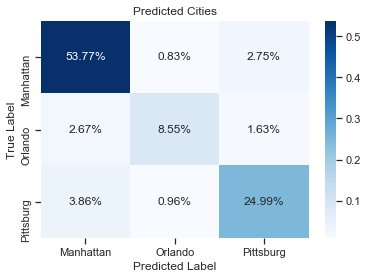

In [ ]:
from sklearn.metrics import confusion_matrix
city_true = np.array(city_true)
city_pred = np.array(city_pred)
cf_matrix = confusion_matrix(city_true, city_pred)
print(cf_matrix)
import seaborn as sns
x_axis_labels = ["Manhattan", "Orlando", "Pittsburg"]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=x_axis_labels, yticklabels=x_axis_labels)
ax.tick_params(left=True, bottom=True) ## other options are right and top

plt.title("Predicted Cities")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("confusion_matrix.pdf", bbox_inches='tight')


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
district_true = np.array(district_true)
district_pred = np.array(district_pred)

acc = accuracy_score(district_pred, district_true - 3)
print(acc)
acc = accuracy_score(city_pred, city_true)
print(acc)
print('City Accuracy : ', precision_recall_fscore_support(city_true, city_pred, average='macro')[0:3])
print('District Accuracy : ', precision_recall_fscore_support(district_true - 3, district_pred, average='macro')[0:3])

0.2726393812439575
0.8619883983242024
City Accuracy :  (0.8480296358757253, 0.8230772425723124, 0.8342176916332528)
District Accuracy :  (0.2564671762803606, 0.22025808332686367, 0.20117715620598622)


##### Feature Ablation to Inspect What Contributed to our Location Being Identified

tensor([[5.3332e-03, 3.2593e-03, 9.9498e-01, 2.1472e-03, 5.4815e-04, 4.2380e-05,
         8.0931e-04, 3.5348e-03, 6.3074e-04, 7.3690e-03, 1.0291e-03, 1.5373e-03,
         2.1804e-03, 5.5180e-04, 1.0080e-03, 3.6867e-04, 1.0219e-04, 2.5899e-04,
         4.9195e-06, 9.9765e-04, 3.5009e-04, 5.0140e-04, 4.1349e-04, 1.1275e-01,
         9.3061e-02, 9.3470e-02, 2.1966e-01, 1.0594e-01, 9.3438e-02, 6.7038e-02,
         2.0645e-01, 7.8952e-04, 1.2049e-01]], grad_fn=<SigmoidBackward>)
tensor([[23]])


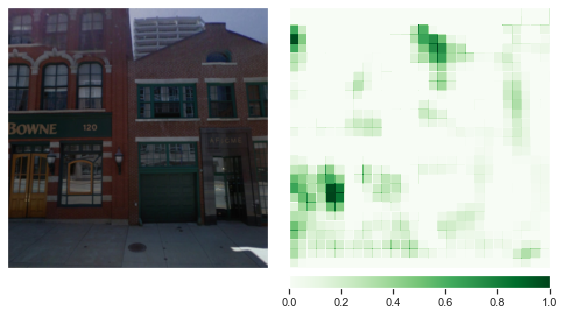

267.1052794456482


In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz
import torch.nn.functional as F
import time 

st = time.time()
occlusion = Occlusion(model)
img = Image.open('Datasets/Dataset_PitOrlManh/images/000020_1.jpg')

transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])



transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )


transformed_img = transform(img)

input = transform_normalize(transformed_img)
input = input.unsqueeze(0)
rand_img_dist = torch.cat([input * 0, input * 1])
output = model(input)
output = F.sigmoid(output)
print(output)
prediction_score, pred_label_idx = torch.topk(output[:,3:], 1)
print(pred_label_idx)
pred_label_idx.squeeze_()
occlusion = Occlusion(model)

attributions_occ = occlusion.attribute(input,
                                       strides = (3, 8, 8),
                                       target=pred_label_idx,
                                       sliding_window_shapes=(3,15, 15),
                                       baselines=0)

_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "positive"],
                                      show_colorbar=True,
                                      outlier_perc=2,
                                     )
print(time.time() - st)


#### Second Model Arch

##### Model Creation and Training

In [ ]:
import torchvision

class ImageLocator2(torch.nn.Module):
    def __init__(self, n_classes1, n_classes2):
        super(ImageLocator2, self).__init__()
        # big pretrained model
        self.pretrained = torchvision.models.resnext101_32x8d(pretrained = True)
        # remove last layer from doing anything
        self.pretrained.fc = torch.nn.Identity()

        # add classification layer
        self.linear1 = torch.nn.Linear(2048, n_classes1)
        self.linear2 = torch.nn.Linear(2048, n_classes2)

    def forward(self, x):
        # I don't want to tune the parameters.
        # I tried tuning but didn't work better so disabling gradients
        # and putting the pretrained network in eval mode.
        #with torch.no_grad():
        #    self.pretrained.eval()
        
        x = self.pretrained(x)
        out1 = self.linear1(x)
        out2 = self.linear2(x)
        return out1, out2
    def only_district_out(self, x):
        x = self.pretrained(x)
        out2 = self.linear2(x)
        return out2
print(len(dataset.categories_to_names))
model = ImageLocator2(3, 30)
model = model.cuda()

33


In [ ]:
def image_viewer(subset, dataset, model, summary_writer, epoch):
  for i in range(len(subset)):
    imgs, labels = subset[i]
    imgs = imgs.unsqueeze(0)
    labels = labels.unsqueeze(0)
    real_im = subset.dataset.dataset.get_img(i)
    imgs = imgs.cuda()
    city_predicted, district_predicted = model(imgs)
    dis_pred = torch.softmax(district_predicted, dim=1).argmax(dim=1)
    label_district = labels[:,3:33].max(dim=1)
    for id, im in enumerate(imgs):
      pred_id = dis_pred[id].cpu().numpy()
      true_id = label_district[id].cpu().numpy()
      category_pred = dataset.categories_to_names[int(pred_id) + 3]
      true_pred = dataset.categories_to_names[int(true_id) + 3]
      caption = 'Predicted District : ' + category_pred + ' and True label : ' +  true_pred + ' Image_num : ' + str(i)
      summary_writer.add_image(caption, transforms.ToTensor()(real_im), epoch)

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment2')
dataiter = iter(train_loader)
images, labels = dataiter.next()
writer.add_graph(model, images.cuda())

In [ ]:
from torch.optim import Adam
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
num_epochs = 10

update_logs = 20
val_image_per_epoch = 1
num_val_images= 5
idx = np.random.choice(len(val_set), num_val_images)
subset = torch.utils.data.Subset(val_set, idx)
optimizer = Adam(model.parameters(), lr = 1e-4, eps = 1e-8)
total_steps = len(train_loader) * num_epochs
scheduler = StepLR(optimizer, 1)

criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()

def top_accuracy(predicted, labels):
    probs = torch.softmax(predicted, dim=1)
    winners = probs.argmax(dim=1)
    corrects = (winners == labels)
    return corrects

# Training Loop. 
best_accuracy = 0
current_step = 0
for epoch in tqdm(range(0, num_epochs)):
    district_cumulative_accuracy = 0
    city_cumulative_accuracy = 0
    cumulative_loss = 0
    num_samples = 0
    logs = {}
    model.train()
    for (batch_id, (imgs, labels)) in enumerate(tqdm(train_loader)):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()
        # Compute predictions.
        city_predicted, district_predicted = model(imgs)
        _, label_district = labels[:,3:33].max(dim=1)
        _, label_city = labels[:,0:3].max(dim=1)
        # Loss = district loss + city label loss
        loss = criterion1(district_predicted, label_district) + criterion1(city_predicted, label_city)

        # Compute cumulative loss and accuracy.
        cumulative_loss += float(loss.data.sum().item())
        city_cumulative_accuracy += float(top_accuracy(city_predicted, label_city).sum().item())
        district_cumulative_accuracy += float(top_accuracy(district_predicted, label_district).sum().item())

        num_samples += float(imgs.size(0))

        # Backpropagation and SGD update step.
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_id % update_logs == 0:
            writer.add_scalar('training district accuracy',
                            district_cumulative_accuracy / num_samples,
                            epoch * len(train_loader) + batch_id)
            writer.add_scalar('training loss',
                            cumulative_loss / num_samples,
                            epoch * len(train_loader) + batch_id)
            writer.add_scalar('training city accuracy',
                            city_cumulative_accuracy / num_samples,
                            epoch * len(train_loader) + batch_id)
            current_step += int(1)
    
    city_cumulative_accuracy = 0
    cumulative_loss = 0
    district_cumulative_accuracy = 0
    num_samples = 0
    model.eval()
    if epoch % val_image_per_epoch == 0:
      image_viewer(subset, dataset, model, writer, epoch)
    for (batch_id, (imgs, labels)) in enumerate(tqdm(val_loader)):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()
        _, label_district = labels[:,3:33].max(dim=1)
        _, label_city = labels[:,0:3].max(dim=1)
        # Compute predictions.
        city_predicted, district_predicted = model(imgs)
        # Loss = district loss + city label loss
        loss = criterion1(district_predicted, label_district) + criterion1(city_predicted, label_city)

        # Compute cumulative loss and accuracy.
        cumulative_loss += float(loss.data.sum().item())
        city_cumulative_accuracy += float(top_accuracy(city_predicted, label_city).sum().item())
        district_cumulative_accuracy += float(top_accuracy(district_predicted, label_district).sum().item())
        num_samples += float(imgs.size(0))
        if (1 + batch_id) % update_logs == 0:
            writer.add_scalar('validation loss',
                            cumulative_loss / num_samples,
                            epoch * len(val_loader) + batch_id)
            writer.add_scalar('validation district accuracy',
                            district_cumulative_accuracy / num_samples,
                            epoch * len(val_loader) + batch_id)
            writer.add_scalar('validation city accuracy',
                            city_cumulative_accuracy / num_samples,
                            epoch * len(val_loader) + batch_id)
            logs['val_accuracy'] = (district_cumulative_accuracy + city_cumulative_accuracy) / (num_samples * 2)    
    if scheduler != -1:
        scheduler.step()
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth') 
writer.close()

##### Running Validation on Second Model

In [ ]:
city_pred = list()
district_pred = list()
city_true = list()
district_true = list()
model.load_state_dict(torch.load('best_model_so_far.pth', map_location='cpu'))
model.to(device='cpu')
model.eval()
update_logs = 1000

def top_accuracy(predicted, labels):
    probs = torch.softmax(predicted, dim=1)
    winners = probs.argmax(dim=1)
    corrects = (winners == labels)
    return corrects

for (batch_id, (imgs, labels)) in enumerate(tqdm(val_loader)):

    imgs = imgs
    labels = labels
    _, label_district = labels[:,3:33].max(dim=1)
    _, label_city = labels[:,0:3].max(dim=1)
        # Compute predictions.
    city_predicted, district_predicted = model(imgs)
        # Loss = district loss + city label loss
    probs = torch.softmax(city_predicted, dim=1)
    cit_predicted = probs.argmax(dim=1)
    probs = torch.softmax(district_predicted, dim=1)
    dis_predicted = probs.argmax(dim=1)

    for dis, cit in zip(label_district, label_city):
        city_true.append(int(dis))
        district_true.append(int(cit))
    for cit, dis in zip(cit_predicted, dis_predicted):
        district_pred.append(int(dis))
        city_pred.append(int(cit))

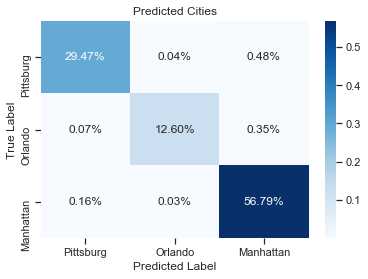

In [ ]:
from sklearn.metrics import confusion_matrix
city_true = np.array(city_true)
city_pred = np.array(city_pred)
cf_matrix = confusion_matrix(district_true, city_pred)
import seaborn as sns
x_axis_labels = ["Pittsburg", "Orlando","Manhattan"]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=x_axis_labels, yticklabels=x_axis_labels)
ax.tick_params(left=True, bottom=True) ## other options are right and top

plt.title("Predicted Cities")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("confusion_matrix.pdf", bbox_inches='tight')

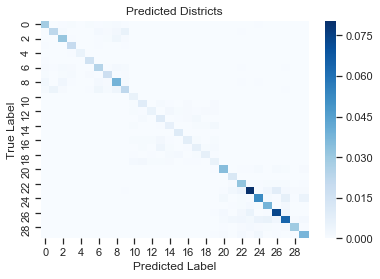

In [ ]:
from sklearn.metrics import confusion_matrix
city_true = np.array(city_true)
city_pred = np.array(city_pred)
cf_matrix = confusion_matrix(city_true, district_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues')
ax.tick_params(left=True, bottom=True) ## other options are right and top

plt.title("Predicted Districts")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("confusion_matrix2.pdf", bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy type: (Precision, Recall, F1 score)')
print('City Accuracy : ', precision_recall_fscore_support(district_true, city_pred, average='macro')[0:3])
print('District Accuracy : ', precision_recall_fscore_support(city_true, district_pred, average='macro')[0:3])

Accuracy type: (Precision, Recall, F1 score)
City Accuracy :  (0.9906704698479548, 0.9823231861385278, 0.9864194142713574)
District Accuracy :  (0.7119843225562268, 0.7346560771630181, 0.715698747224846)


##### Qualitative Testing Images Outside Dataset

Model Probability of image being in city  0  :  0.669911801815033
Model Probability of image being in district  8  :  0.41606414318084717


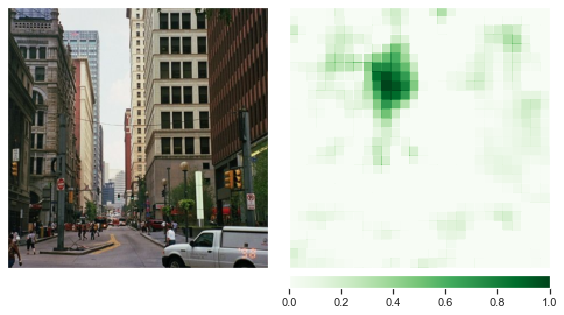

Seconds it took to run :  325.7138361930847


In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz
import torch.nn.functional as F
import time 

model.load_state_dict(torch.load('best_model_so_far.pth', map_location='cpu'))
model.to(device='cpu')
model.eval()

st = time.time()
img = Image.open('Datasets/Dataset_PitOrlManh/test_images/sample_pa_downtown.jpg')

transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])



transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )


transformed_img = transform(img)

input = transform_normalize(transformed_img)
input = input.unsqueeze(0)
rand_img_dist = torch.cat([input * 0, input * 1])
cit, dis = model(input)
probs = torch.softmax(dis, dim=1)
probability, pred_label_idx = probs.max(dim=1)
pred_label_idx.squeeze_()
probs = torch.softmax(cit, dim=1)
probability2, pred_label_idx2 = probs.max(dim=1)
pred_label_idx2.squeeze_()
print('Model Probability of image being in city ', int(pred_label_idx2)  ,' : ', float(probability2))
print('Model Probability of image being in district ', int(pred_label_idx)  ,' : ', float(probability))
pred_label_idx2.squeeze_()
occlusion = Occlusion(model.only_district_out)
attributions_occ = occlusion.attribute(input,
                                       strides = (3, 8, 8),
                                       target=pred_label_idx,
                                       sliding_window_shapes=(3,15, 15),
                                       baselines=0)

_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "positive"],
                                      show_colorbar=True,
                                      outlier_perc=2,
                                     )
print('Seconds it took to run : ', time.time() - st)

In [ ]:
def feature_anaylsis_occlusion(image : str = ""):
    from captum.attr import IntegratedGradients
    from captum.attr import GradientShap
    from captum.attr import Occlusion
    from captum.attr import NoiseTunnel
    from captum.attr import visualization as viz
    import torch.nn.functional as F
    import time 
    model.load_state_dict(torch.load('best_model_so_far.pth', map_location='cpu'))
    model.to(device='cpu')
    model.eval()

    st = time.time()
    img = Image.open(image)

    transform = transforms.Compose([
     transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor()
    ])



    transform_normalize = transforms.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
     )


    transformed_img = transform(img)

    input = transform_normalize(transformed_img)
    input = input.unsqueeze(0)
    rand_img_dist = torch.cat([input * 0, input * 1])
    cit, dis = model(input)
    probs = torch.softmax(dis, dim=1)
    probability, pred_label_idx = probs.max(dim=1)
    pred_label_idx.squeeze_()
    probs = torch.softmax(cit, dim=1)
    probability2, pred_label_idx2 = probs.max(dim=1)
    pred_label_idx2.squeeze_()
    print('Model Probability of image being in city ', int(pred_label_idx2)  ,' : ', float(probability2))
    print('Model Probability of image being in district ', int(pred_label_idx)  ,' : ', float(probability))
    pred_label_idx2.squeeze_()
    occlusion = Occlusion(model.only_district_out)
    attributions_occ = occlusion.attribute(input,
                                           strides = (3, 8, 8),
                                           target=pred_label_idx,
                                           sliding_window_shapes=(3,15, 15),
                                           baselines=0)

    _ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                          np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                          ["original_image", "heat_map"],
                                          ["all", "positive"],
                                          show_colorbar=True,
                                          outlier_perc=2,
                                         )
    print('Seconds it took to run : ', time.time() - st)

Model Probability of image being in city  2  :  0.9953517913818359
Model Probability of image being in district  24  :  0.7208319902420044


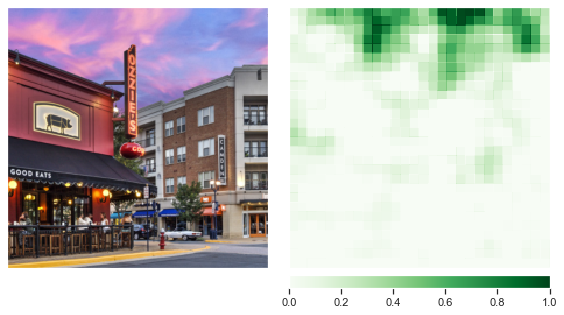

Seconds it took to run :  315.76471638679504


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/downtown_fairfax.jpg')

Model Probability of image being in city  0  :  0.4439203441143036
Model Probability of image being in district  2  :  0.9119203686714172


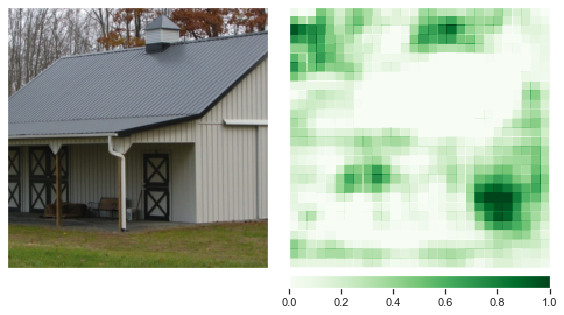

Seconds it took to run :  310.7199809551239


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/generic_rural.jpg')

Model Probability of image being in city  2  :  0.9994578957557678
Model Probability of image being in district  26  :  0.8446536660194397


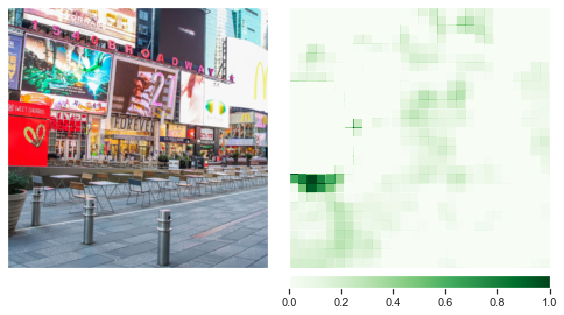

Seconds it took to run :  316.7732493877411


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/manhattan.jpg')

Model Probability of image being in city  0  :  0.772214949131012
Model Probability of image being in district  20  :  0.4669075608253479


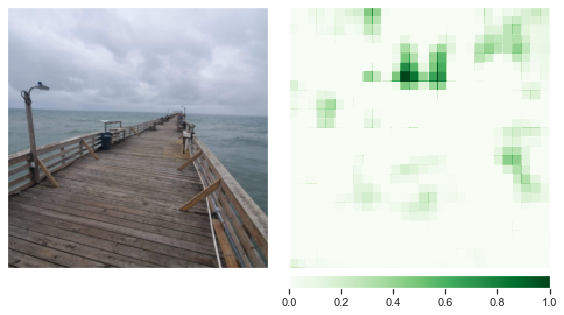

Seconds it took to run :  297.81454610824585


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/ocean.jpg')

Model Probability of image being in city  0  :  0.9967679977416992
Model Probability of image being in district  8  :  0.7879197597503662


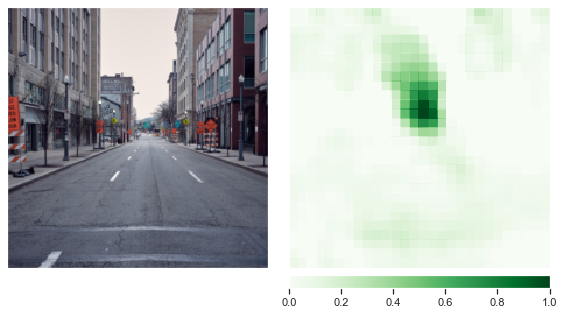

Seconds it took to run :  315.30263900756836


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/pa_downtown.jpg')

#### Final Model Architecture

##### Model Creation and Training

In [ ]:
import torchvision
from simple_hierarchy.hierarchal_model import HierarchalModel 

class DemoModel(torch.nn.Module):
    def __init__(self, base_model):
        super(DemoModel, self).__init__()
        hierarchy = {
            ('A', 3) : [('B', 30)]
        }
        self.model = HierarchalModel(base_model=base_model, 
                        hierarchy=hierarchy, size=(1000,256,256), 
                        output_order=[('A', 3), ('B',30)])
    def forward(self, x):
        return self.model(x)
    def only_district_out(self, x):
        return self.model(x)[1]
    def load_state_dict(self, weights):
        self.model.load_state_dict(weights)
base_model = torchvision.models.resnext101_32x8d(pretrained = True)
model = DemoModel(base_model)
model = model.cuda()

def image_viewer(subset, dataset, model, summary_writer, epoch):
  for i in range(len(subset)):
    imgs, labels = subset[i]
    imgs = imgs.unsqueeze(0)
    labels = labels.unsqueeze(0)
    real_im = subset.dataset.dataset.get_img(i)
    imgs = imgs.cuda()
    city_predicted, district_predicted = model(imgs)
    dis_pred = torch.softmax(district_predicted, dim=1).argmax(dim=1)
    label_district = labels[:,3:33].max(dim=1)
    for id, im in enumerate(imgs):
      pred_id = dis_pred[id].cpu().numpy()
      true_id = label_district[id].cpu().numpy()
      category_pred = dataset.categories_to_names[int(pred_id) + 3]
      true_pred = dataset.categories_to_names[int(true_id) + 3]
      caption = 'Predicted District : ' + category_pred + ' and True label : ' +  true_pred + ' Image_num : ' + str(i)
      summary_writer.add_image(caption, transforms.ToTensor()(real_im), epoch)

In [ ]:
model.last_layers

ModuleDict(
  (('A', 3)): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=3, bias=True)
  )
  (('B', 30)): Sequential(
    (0): Linear(in_features=1003, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=30, bias=True)
  )
)

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment3')
dataiter = iter(train_loader)
images, labels = dataiter.next()
writer.add_graph(model, images.cuda())

In [ ]:
from torch.optim import Adam
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
num_epochs = 10

update_logs = 20
val_image_per_epoch = 1
num_val_images= 5
idx = np.random.choice(len(val_set), num_val_images)
subset = torch.utils.data.Subset(val_set, idx)
optimizer = Adam(model.parameters(), lr = 1e-4, eps = 1e-8)
total_steps = len(train_loader) * num_epochs
scheduler = StepLR(optimizer, 1)

criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()

def top_accuracy(predicted, labels):
    probs = torch.softmax(predicted, dim=1)
    winners = probs.argmax(dim=1)
    corrects = (winners == labels)
    return corrects

# Training Loop. 
best_accuracy = 0
current_step = 0
for epoch in tqdm(range(0, num_epochs)):
    district_cumulative_accuracy = 0
    city_cumulative_accuracy = 0
    cumulative_loss = 0
    num_samples = 0
    logs = {}
    model.train()
    for (batch_id, (imgs, labels)) in enumerate(tqdm(train_loader)):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()
        # Compute predictions.
        city_predicted, district_predicted = model(imgs)
        _, label_district = labels[:,3:33].max(dim=1)
        _, label_city = labels[:,0:3].max(dim=1)
        # Loss = district loss + city label loss
        loss = criterion1(district_predicted, label_district) + criterion1(city_predicted, label_city)

        # Compute cumulative loss and accuracy.
        cumulative_loss += float(loss.data.sum().item())
        city_cumulative_accuracy += float(top_accuracy(city_predicted, label_city).sum().item())
        district_cumulative_accuracy += float(top_accuracy(district_predicted, label_district).sum().item())

        num_samples += float(imgs.size(0))

        # Backpropagation and SGD update step.
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_id % update_logs == 0:
            writer.add_scalar('training district accuracy',
                            district_cumulative_accuracy / num_samples,
                            epoch * len(train_loader) + batch_id)
            writer.add_scalar('training loss',
                            cumulative_loss / num_samples,
                            epoch * len(train_loader) + batch_id)
            writer.add_scalar('training city accuracy',
                            city_cumulative_accuracy / num_samples,
                            epoch * len(train_loader) + batch_id)
            current_step += int(1)
    
    city_cumulative_accuracy = 0
    cumulative_loss = 0
    district_cumulative_accuracy = 0
    num_samples = 0
    model.eval()
    if epoch % val_image_per_epoch == 0:
      image_viewer(subset, dataset, model, writer, epoch)
    for (batch_id, (imgs, labels)) in enumerate(tqdm(val_loader)):
        # Move to GPU.
        imgs = imgs.cuda()
        labels = labels.cuda()
        _, label_district = labels[:,3:33].max(dim=1)
        _, label_city = labels[:,0:3].max(dim=1)
        # Compute predictions.
        city_predicted, district_predicted = model(imgs)
        # Loss = district loss + city label loss
        loss = criterion1(district_predicted, label_district) + criterion1(city_predicted, label_city)

        # Compute cumulative loss and accuracy.
        cumulative_loss += float(loss.data.sum().item())
        city_cumulative_accuracy += float(top_accuracy(city_predicted, label_city).sum().item())
        district_cumulative_accuracy += float(top_accuracy(district_predicted, label_district).sum().item())
        num_samples += float(imgs.size(0))
        if (1 + batch_id) % update_logs == 0:
            writer.add_scalar('validation loss',
                            cumulative_loss / num_samples,
                            epoch * len(val_loader) + batch_id)
            writer.add_scalar('validation district accuracy',
                            district_cumulative_accuracy / num_samples,
                            epoch * len(val_loader) + batch_id)
            writer.add_scalar('validation city accuracy',
                            city_cumulative_accuracy / num_samples,
                            epoch * len(val_loader) + batch_id)
            logs['val_accuracy'] = (district_cumulative_accuracy + city_cumulative_accuracy) / (num_samples * 2)    
    if scheduler != -1:
        scheduler.step()
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth') 
writer.close()

##### Running Validation on Third Model

In [ ]:
city_pred = list()
district_pred = list()
city_true = list()
district_true = list()
model.load_state_dict(torch.load('best_model_so_far.pth', map_location='cpu'))
model.to(device='cpu')
model.eval()
update_logs = 1000

def top_accuracy(predicted, labels):
    probs = torch.softmax(predicted, dim=1)
    winners = probs.argmax(dim=1)
    corrects = (winners == labels)
    return corrects

for (batch_id, (imgs, labels)) in enumerate(tqdm(val_loader)):

    imgs = imgs
    labels = labels
    _, label_district = labels[:,3:33].max(dim=1)
    _, label_city = labels[:,0:3].max(dim=1)
        # Compute predictions.
    city_predicted, district_predicted = model(imgs)
        # Loss = district loss + city label loss
    probs = torch.softmax(city_predicted, dim=1)
    cit_predicted = probs.argmax(dim=1)
    probs = torch.softmax(district_predicted, dim=1)
    dis_predicted = probs.argmax(dim=1)

    for dis, cit in zip(label_district, label_city):
        city_true.append(int(dis))
        district_true.append(int(cit))
    for cit, dis in zip(cit_predicted, dis_predicted):
        district_pred.append(int(dis))
        city_pred.append(int(cit))

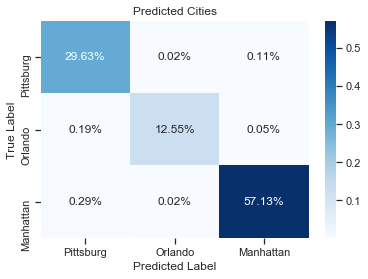

In [ ]:
from sklearn.metrics import confusion_matrix
city_true = np.array(city_true)
city_pred = np.array(city_pred)
cf_matrix = confusion_matrix(district_true, city_pred)
import seaborn as sns
x_axis_labels = ["Pittsburg", "Orlando","Manhattan"]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=x_axis_labels, yticklabels=x_axis_labels)
ax.tick_params(left=True, bottom=True) ## other options are right and top

plt.title("Predicted Cities")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("confusion_matrix.pdf", bbox_inches='tight')

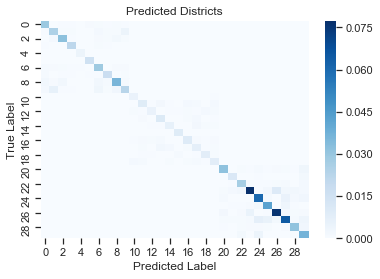

In [ ]:
from sklearn.metrics import confusion_matrix
city_true = np.array(city_true)
city_pred = np.array(city_pred)
cf_matrix = confusion_matrix(city_true, district_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues')
ax.tick_params(left=True, bottom=True) ## other options are right and top

plt.title("Predicted Districts")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("confusion_matrix2.pdf", bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy type: (Precision, Recall, F1 score)')
print('City Accuracy : ', precision_recall_fscore_support(district_true, city_pred, average='macro')[0:3])
print('District Accuracy : ', precision_recall_fscore_support(city_true, district_pred, average='macro')[0:3])

Accuracy type: (Precision, Recall, F1 score)
City Accuracy :  (0.9925210245418118, 0.990551956803348, 0.9915077993674896)
District Accuracy :  (0.7396852744617928, 0.7547717042826745, 0.7435882124083268)


In [ ]:
def feature_anaylsis_occlusion(image : str = "", save_fig : str = "", true_label : str = ""):
    from captum.attr import IntegratedGradients
    from captum.attr import GradientShap
    from captum.attr import Occlusion
    from captum.attr import NoiseTunnel
    from captum.attr import visualization as viz
    import torch.nn.functional as F
    import time 
    model.load_state_dict(torch.load('hierarchy/best_model_so_far.pth', map_location='cpu'))
    model.to(device='cpu')
    model.eval()

    st = time.time()
    img = Image.open(image)

    transform = transforms.Compose([
     transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor()
    ])



    transform_normalize = transforms.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
     )


    transformed_img = transform(img)

    input = transform_normalize(transformed_img)
    input = input.unsqueeze(0)
    rand_img_dist = torch.cat([input * 0, input * 1])
    cit, dis = model(input)
    probs = torch.softmax(dis, dim=1)
    probability, pred_label_idx = probs.max(dim=1)
    pred_label_idx.squeeze_()
    probs = torch.softmax(cit, dim=1)
    probability2, pred_label_idx2 = probs.max(dim=1)
    pred_label_idx2.squeeze_()
    cities = ["Pittsburg", "Orlando","Manhattan"]
    print('Model Probability of image being in city ', cities[int(pred_label_idx2)]  ,' : ', float(probability2))
    print('Model Probability of image being in district ', int(pred_label_idx)  ,' : ', float(probability))
    pred_label_idx2.squeeze_()
    occlusion = Occlusion(model.only_district_out)
    attributions_occ = occlusion.attribute(input,
                                           strides = (3, 8, 8),
                                           target=pred_label_idx,
                                           sliding_window_shapes=(3,15, 15),
                                           baselines=0)

    fig, ax = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                          np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                          ["original_image", "heat_map"],
                                          ["all", "positive"],
                                          show_colorbar=True,
                                          outlier_perc=2,
                                         )
    
    fig.suptitle('Feature Attribution through Occlusion')
    fig.savefig(save_fig)
    print('Seconds it took to run : ', time.time() - st)

##### Qualitative Testing Images Outside Dataset

Model Probability of image being in city  Pittsburg  :  0.8450136780738831
Model Probability of image being in district  9  :  0.33201050758361816


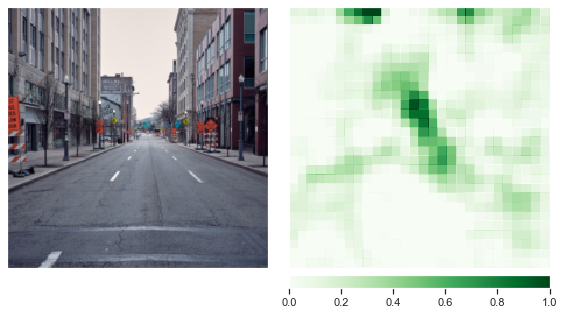

Seconds it took to run :  280.22804379463196


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/pa_downtown.jpg', save_fig='downtown_pa.pdf', true_label='Pittsburg')

Model Probability of image being in city  Manhattan  :  0.9999892711639404
Model Probability of image being in district  26  :  0.9868850708007812


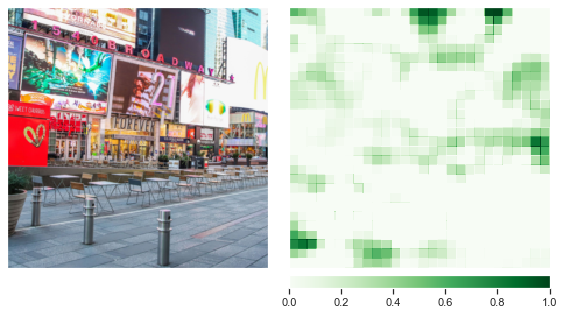

Seconds it took to run :  288.58894515037537


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/manhattan.jpg', save_fig='manhattan.pdf', true_label='Pittsburg')

tensor([[9.1146e-01, 5.2331e-04, 8.8021e-02]], grad_fn=<SoftmaxBackward>)
Model Probability of image being in city  Pittsburg  :  0.9114558100700378
Model Probability of image being in district  8  :  0.44542527198791504


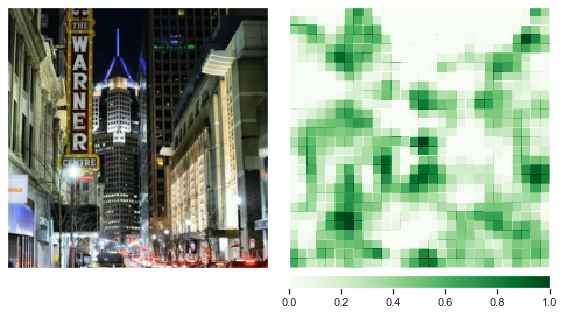

Seconds it took to run :  290.76057982444763


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/sample_pa_downtown.jpg', save_fig='night.pdf', true_label='Pittsburg')

tensor([[9.9815e-01, 7.5827e-06, 1.8450e-03]], grad_fn=<SoftmaxBackward>)
Model Probability of image being in city  Pittsburg  :  0.9981473684310913
Model Probability of image being in district  8  :  0.6779283881187439


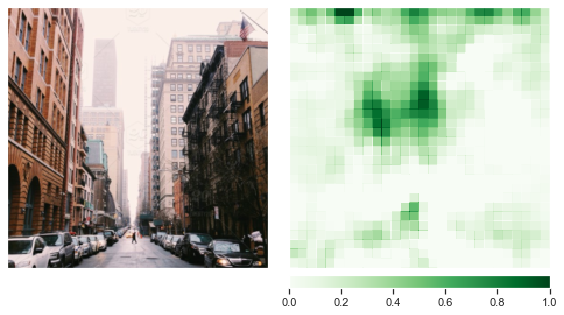

Seconds it took to run :  316.72413992881775


In [ ]:
feature_anaylsis_occlusion('Datasets/Dataset_PitOrlManh/test_images/misclassification.jpg', save_fig='misclassification.pdf', true_label='Pittsburg')